# Задание 1

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [18]:
df = pd.read_csv('flight_delays.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [102]:
rows = df.shape[0] # Количество строк

## Доля всех задержек ко всем вылетам

Количество задержек: 19.0 %
Количество вылетов без задержки: 81.0 %


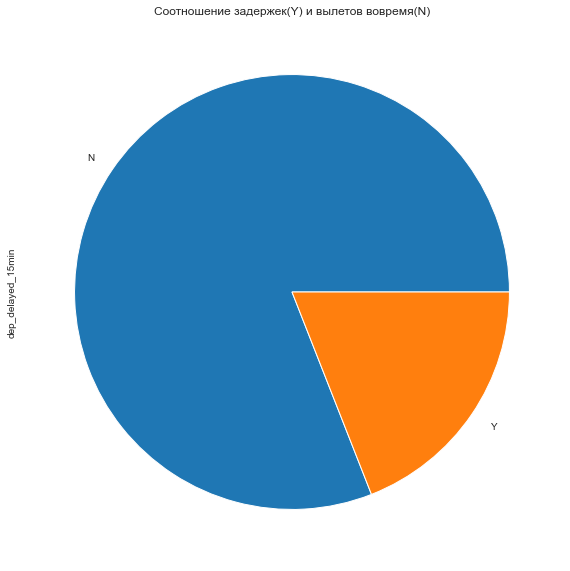

In [20]:
#print(df['dep_delayed_15min'].value_counts(normalize=True)[1]) Точное значение
print('Количество задержек:', round(df['dep_delayed_15min'].value_counts(normalize=True)[1], 2)*100,'%')
print('Количество вылетов без задержки:', round(df['dep_delayed_15min'].value_counts(normalize=True)[0], 2)*100,'%') # Более наглядный результат
df['dep_delayed_15min'].value_counts(normalize=True).plot(kind='pie', figsize=(10,10))
plt.title('Соотношение задержек(Y) и вылетов вовремя(N)');

## Зависимость количества задержек от длины перелёта

In [33]:
df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()

,Distance
1241,1
699,1
555,1
523,1
710,1
...,...
761,87
528,88
612,89
403,90


In [34]:
df1 = df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()
new_df = pd.DataFrame({'Distance' : df1.index, 'Number' : df1['Distance'].values})

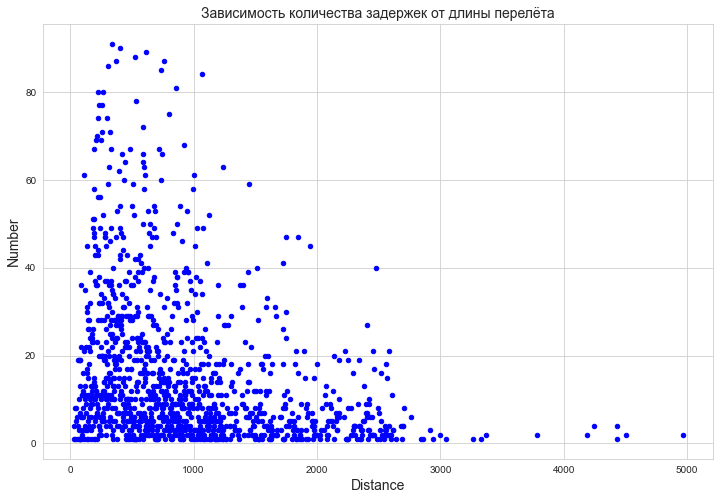

In [35]:
new_df.plot.scatter(x = 'Distance', y = 'Number', c ='Blue', figsize = (12, 8));
plt.title('Зависимость количества задержек от длины перелёта', fontsize = 14);
plt.xlabel('Distance', fontsize = 14)
plt.ylabel('Number', fontsize = 14)
plt.show()

_Можно отметить, что задержек в среднем значительно при перелётах на небольшие (до 1000 км) расстояния, при этом при очень далёких перелётах (больше 3000 км) их практически нет - возможно, это связано с более тщательной подготовкой к таким (более трудным) перелётам._

## Топ 5 направлений, для которых чаще всего происходят задержки

In [25]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [36]:
df2 = df[(df['dep_delayed_15min'] == 'Y')][['Origin', 'Dest']].value_counts(ascending=False).to_frame()
df2.head(10)

,,0
Origin,Dest,
ATL,LGA,50
ORD,LGA,45
LAS,LAX,40
ATL,EWR,39
DFW,ORD,37
LAX,LAS,37
LGA,ORD,36
PHX,LAS,34
ATL,DFW,32


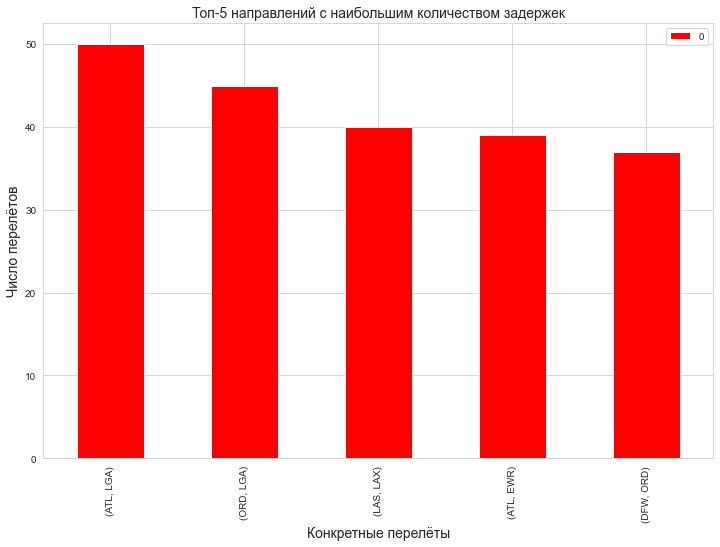

In [37]:
df2.head(5).plot.bar(figsize = (12, 8), color = 'red', label = 'количество перелётов')
plt.title('Топ-5 направлений с наибольшим количеством задержек', fontsize = 14);
plt.xlabel('Конкретные перелёты', fontsize = 14)
plt.ylabel('Число перелётов', fontsize = 14)
plt.show()

_Из этих 5 направлений наибольшие проблемы у 2 перелётов  - ATL <-> LGA и ORD <-> LGA. Видно, что достаточно часто возникают проблемы на принимающей стороне, возможно, погодные или технические условия вынуждают переносить рейс в этот пункт._

## В какие времена года чаще всего происходят задержки рейсов

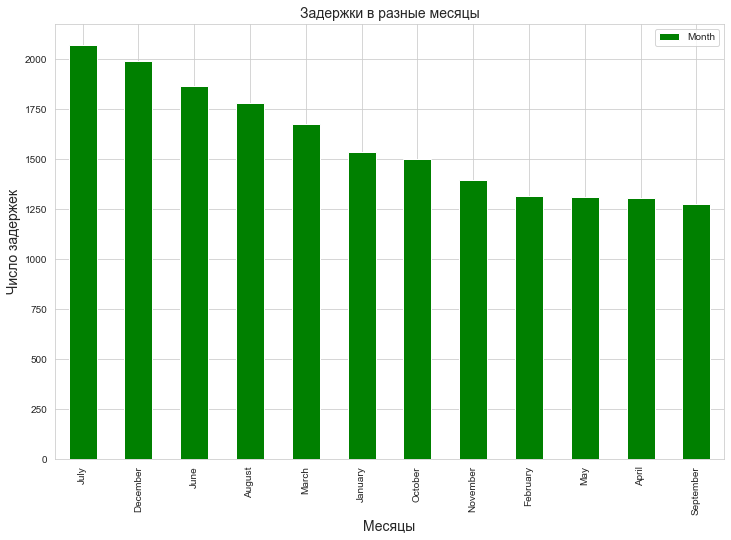

In [38]:
df3 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'Month' : {'c-1':'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June',
                'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})
                    
df3_new = df3['Month'].value_counts(ascending=False).to_frame()
df3_new.plot.bar(figsize = (12, 8), color = 'green')
plt.title('Задержки в разные месяцы', fontsize = 14);
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Число задержек', fontsize = 14)
plt.show()


_На графике явно видно, что наибольшее количество задежек в летние месяцы, а также в декабре(возможно, из-за повышенного пассажиропотока на фоне праздников)._

## Топ-10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

_Здесь имеет смысл сравнивать не по абсолютному количеству вылетов, а по относительному (соотношение кол-ва рейсов с задержкой/без задержки) - хотя это тоже спорный вопрос, поскольку "лучший" перевозчик может иметь в несколько раз меньше вылетов, чем некоторый более крупный перевозчик. С другой стороны, если у крупного перевозчика много задержек, то это тоже не очень хорошо)_

In [57]:
No_delayed = df[(df['dep_delayed_15min'] == 'N')]['UniqueCarrier'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['UniqueCarrier'].value_counts(ascending=False)


In [58]:
ratio = delayed/No_delayed

In [59]:
df4 = ratio.sort_values(ascending=True).iloc[0:10]

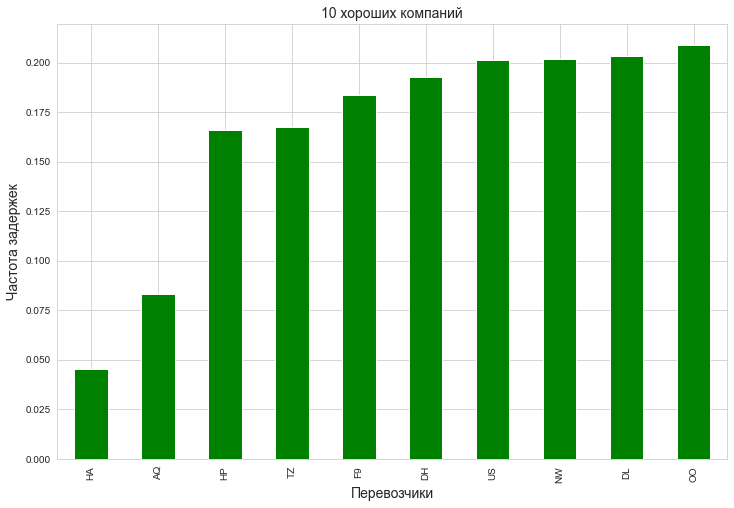

In [62]:
df4.plot.bar(figsize = (12, 8), color = 'green')
plt.title('10 хороших компаний', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

In [75]:
print(df['UniqueCarrier'].value_counts(ascending=False))

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64


_Я бы сказал, что лучшим перевозчиком по праву является HA, поскольку он имеет не самое малое число перелётов, при этом всём задержек минимальное количество (менее 5%). Насчёт AQ спорно, может, при большей выборке число задержек бы увеличилось (так, чтобы выросло в процентном соотношении)._
_Также интересно здесь то, что крупные "акулы", например, US, имеет в процентном соотношении примерно столько же задержек, как и куда менее крупный DH, что явно в плюс первому._

## Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [83]:
# Способ "в лоб"
No_delayed_A = df[(df['dep_delayed_15min'] == 'N')]['Origin'].value_counts(ascending=False)
delayed_A = df[(df['dep_delayed_15min'] == 'Y')]['Origin'].value_counts(ascending=False)
ratio_A = delayed_A/No_delayed_A
df5 = ratio_A.sort_values(ascending=False).iloc[0:10]
print(df['Origin'].value_counts(ascending=False)[['LWB', 'BRW', 'GUC', 'ADQ', 'SCC', 'TEX', 'DLG', 'EGE', 'TUP', 'PSG']])

LWB     4
BRW     7
GUC    12
ADQ     5
SCC     4
TEX     2
DLG     5
EGE    25
TUP     6
PSG    18
Name: Origin, dtype: int64


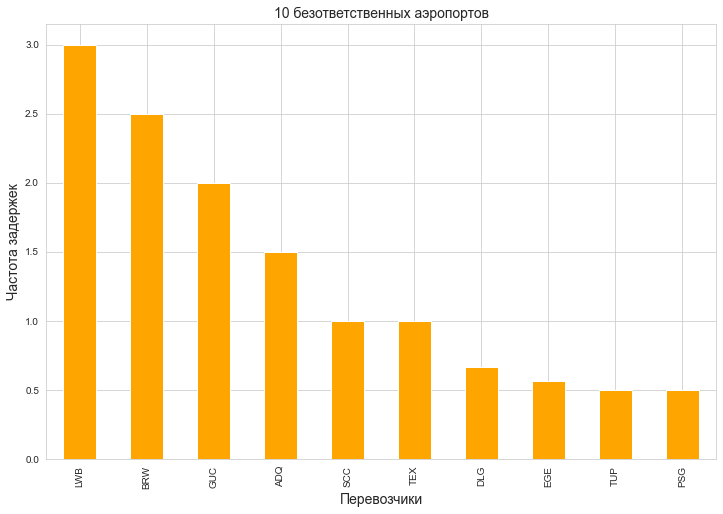

In [85]:
df5.plot.bar(figsize = (12, 8), color = 'orange')
plt.title('10 безответственных аэропортов', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

_Вы только посмотрите, у LWB в 3 раза больше задержек, чем рейсов, отправленных вовремя!!!! - Осталось лишь добавить, что всего было 4 полёта)))) Поэтому возьмём только те аэропорты у которых, скажем, больше 500 вылетов вовремя:_

In [100]:
No_delayed_A_500 = No_delayed_A[No_delayed_A > 500]
delayed_A_500 = delayed_A
ratio_A_500 = delayed_A_500/No_delayed_A_500
df5_500 = ratio_A_500.sort_values(ascending=False).iloc[0:10]

In [101]:
df5_500

ATL    0.347967
ORD    0.346792
MDW    0.335288
EWR    0.324487
PHL    0.315704
HOU    0.313015
MIA    0.297414
JFK    0.285223
LAS    0.277580
DTW    0.274282
Name: Origin, dtype: float64

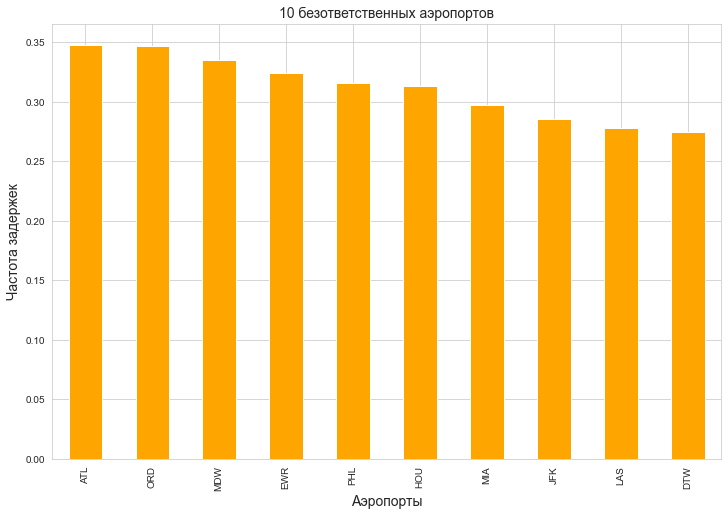

In [105]:
df5_500.plot.bar(figsize = (12, 8), color = 'orange')
plt.title('10 безответственных аэропортов', fontsize = 14);
plt.xlabel('Аэропорты', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

_Теперь это более полезный показатель, а то если мы в целом хотим оценить проблемы с аэропортами - имеет смысл смотреть те, у которых достаточное количество вылетов (а то будет так, как в примере выше)._

## Необычная зависимость количества задержек от имеющихся данных

_Давайте оценим, в какой из дней недели большинство задержек :) Изначально предполагается, что оно должно быть равномерным (ну казалось бы, это же не смена сезона, а всего лишь конкретный день). Ну проверим)_

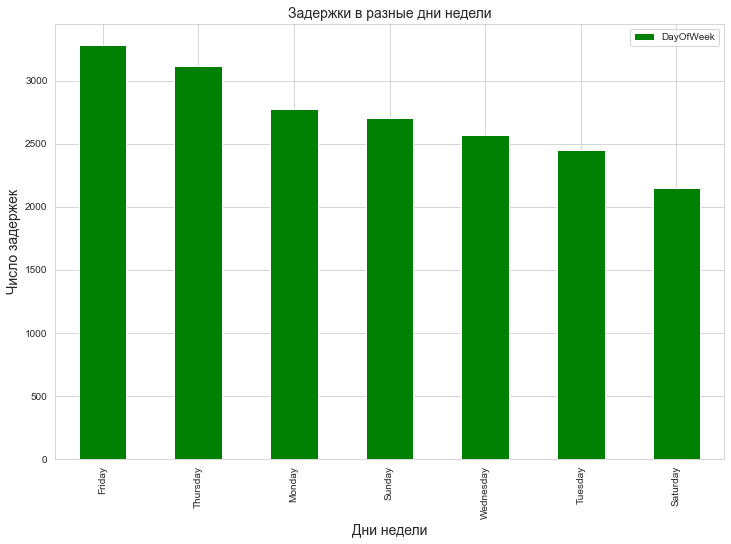

In [109]:
df6 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'DayOfWeek' : {'c-1':'Monday', 'c-2':'Tuesday', 'c-3':'Wednesday', 'c-4':'Thursday', 'c-5':'Friday', 'c-6':'Saturday', 'c-7':'Sunday'}})
                    
df6_new = df6['DayOfWeek'].value_counts(ascending=False).to_frame()
df6_new.plot.bar(figsize = (12, 8), color = 'green')
plt.title('Задержки в разные дни недели', fontsize = 14);
plt.xlabel('Дни недели', fontsize = 14)
plt.ylabel('Число задержек', fontsize = 14)
plt.show()

_Первое предположение оказалось ошибочным - в пятницу на 1000(!) больше задержек, чем в субботу). Конечно, это связано с расписанием выходных у людей, видимо, в пятницу людей попросту больше - оттуда и большинство задержек (мало ли какие проблемы с регистрацией и прочее)._